In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import librosa
import librosa.display
import os
from pathlib import Path



In [2]:
audio = "music_data/genres_original/metal/metal.00001.wav"
x,y = librosa.load(audio)

In [3]:
import IPython.display as ipd
ipd.Audio(audio)

In [4]:
len(x)

661504

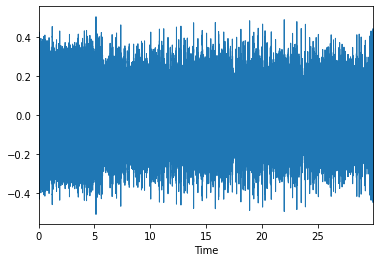

In [5]:
librosa.display.waveplot(x,sr=y)

In [6]:
dir = Path('music_data/genres_original')


In [7]:
filepaths = list(dir.glob(r'**/*.wav'))

In [8]:
labels = list(map(lambda l: os.path.split(os.path.split(l)[0])[1], filepaths))

In [9]:
df = pd.DataFrame({'filepaths':filepaths, 'labels':labels})

In [10]:
classes = df.labels.unique()

In [11]:
df

,filepaths,labels
0,music_data\genres_original\blues\blues.00000.wav,blues
1,music_data\genres_original\blues\blues.00001.wav,blues
2,music_data\genres_original\blues\blues.00002.wav,blues
3,music_data\genres_original\blues\blues.00003.wav,blues
4,music_data\genres_original\blues\blues.00004.wav,blues
...,...,...
995,music_data\genres_original\rock\rock.00095.wav,rock
996,music_data\genres_original\rock\rock.00096.wav,rock
997,music_data\genres_original\rock\rock.00097.wav,rock
998,music_data\genres_original\rock\rock.00098.wav,rock


In [12]:

data = []

for x in df.filepaths:
    
    try:
        data.append(librosa.load(x))
    except:
        data.append(None)
    

C:\Users\emiel\anaconda3\lib\site-packages\librosa\core\audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [13]:
df['data'] = data

In [14]:
len(df)

1000

In [15]:
df = df.dropna()

In [16]:
X = df.data
y = df.labels

In [17]:
X = [X[0][0] for i in X]

In [18]:
#X = np.expand_dims(np.array(X),axis = 0)

In [19]:
X = np.array(X)

In [20]:
y.shape

(999,)

In [21]:
X.shape

(999, 661794)

In [25]:
len(y[0])

10

In [23]:
y = np.array(pd.get_dummies(pd.DataFrame(y)))

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(10,activation = 'softmax')
])

model.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy']
              
             )


history = model.fit(X,y,epochs = 2)

Epoch 1/2
 3/32 [=>............................] - ETA: 2:30 - loss: 171.5412 - accuracy: 0.0729

In [30]:
max(X[0])

0.885376